In [1]:
import sys
import argparse

sys.argv = ['script_name', '--forward_amount', '0.5']

parser = argparse.ArgumentParser()
parser.add_argument('--forward_amount', type=float, help='前进的距离')

args = parser.parse_args()

print(f"Forward Amount: {args.forward_amount}")

Forward Amount: 0.5


In [2]:
from config import config
import attr
from env.v0d0 import Env
import torch
import numpy as np
import habitat_sim
from habitat.utils.visualizations import maps
import random
from PID import NextPoint
from draw import Draw
random.seed(43)

/home/kongxiangyu/anaconda3/envs/ss/lib/python3.9/site-packages/tqdm-4.66.1-py3.9.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-27 19:30:08.599475: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-27 19:30:08.618661: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-27 19:30:08.618682: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been reg

In [3]:
env = Env(config)
env.reset()
sim = env._sim

[19:30:10:047336]:[Metadata] AttributesManagerBase.h(380)::createFromJsonOrDefaultInternal : <Dataset>: Proposing JSON name : default.scene_dataset_config.json from original name : default| This file does not exist.
[19:30:10:047383]:[Metadata] AssetAttributesManager.cpp(121)::createObject : Asset attributes (capsule3DSolid:capsule3DSolid_hemiRings_4_cylRings_1_segments_12_halfLen_0.75_useTexCoords_false_useTangents_false) created and registered.
[19:30:10:047397]:[Metadata] AssetAttributesManager.cpp(121)::createObject : Asset attributes (capsule3DWireframe:capsule3DWireframe_hemiRings_8_cylRings_1_segments_16_halfLen_1) created and registered.
[19:30:10:047404]:[Metadata] AssetAttributesManager.cpp(121)::createObject : Asset attributes (coneSolid:coneSolid_segments_12_halfLen_1.25_rings_1_useTexCoords_false_useTangents_false_capEnd_true) created and registered.
[19:30:10:047411]:[Metadata] AssetAttributesManager.cpp(121)::createObject : Asset attributes (coneWireframe:coneWireframe_s

[19:30:10:047735]:[Metadata] SceneDatasetAttributesManager.cpp(308)::readDatasetJSONCell : "stages.default_attributes" set in Attributes Manager from JSON.
[19:30:10:047759]:[Metadata] AttributesManagerBase.h(352)::buildAttrSrcPathsFromJSONAndLoad : Glob path result for ../data/scene_datasets/mp3d/*/*.glb : ../data/scene_datasets/mp3d/17DRP5sb8fy/17DRP5sb8fy.glb
[19:30:10:047800]:[Metadata] SceneInstanceAttributesManager.cpp(65)::setValsFromJSONDoc : No Stage specified for scene default_attributes , or specification error.
[19:30:10:047803]:[Metadata] SceneInstanceAttributesManager.cpp(105)::setValsFromJSONDoc : No Articulated Objects specified for scene default_attributes , or specification error.
[19:30:10:047806]:[Metadata] SceneInstanceAttributesManager.cpp(125)::setValsFromJSONDoc : No navmesh_instance specified for scene default_attributes .
[19:30:10:047809]:[Metadata] SceneInstanceAttributesManager.cpp(135)::setValsFromJSONDoc : No semantic_scene_instance specified for scene de

rame) created and registered.
[19:30:10:047629]:[Metadata] AssetAttributesManager.cpp(121)::createObject : Asset attributes (cylinderSolid:cylinderSolid_rings_1_segments_12_halfLen_1_useTexCoords_false_useTangents_false_capEnds_true) created and registered.
[19:30:10:047634]:[Metadata] AssetAttributesManager.cpp(121)::createObject : Asset attributes (cylinderWireframe:cylinderWireframe_rings_1_segments_32_halfLen_1) created and registered.
[19:30:10:047639]:[Metadata] AssetAttributesManager.cpp(121)::createObject : Asset attributes (icosphereSolid:icosphereSolid_subdivs_1) created and registered.
[19:30:10:047644]:[Metadata] AssetAttributesManager.cpp(121)::createObject : Asset attributes (icosphereWireframe:icosphereWireframe_subdivs_1) created and registered.
[19:30:10:047649]:[Metadata] AssetAttributesManager.cpp(121)::createObject : Asset attributes (uvSphereSolid:uvSphereSolid_rings_8_segments_16_useTexCoords_false_useTangents_false) created and registered.
[19:30:10:047654]:[Meta

void' was not found. Using default material instead.
Material for category 'misc' was not found. Using default material instead.
Material for category 'picture' was not found. Using default material instead.
Material for category 'objects' was not found. Using default material instead.
Material for category 'void' was not found. Using default material instead.
Material for category 'misc' was not found. Using default material instead.


In [4]:
# from draw import Draw
# drawer = Draw()
# star = sim.pathfinder.get_random_navigable_point()
# path_ = habitat_sim.ShortestPath()
# path_.requested_start = star
# for i in range(5):
#     end = sim.pathfinder.get_random_navigable_point()
#     print(end)
#     path_.requested_end = end
#     sim.pathfinder.find_path(path_)
#     path = path_.points
#     pic = drawer.draw(sim,path)
#     drawer.display_map(pic)

In [5]:
aim_sound_point = env.get_source_pos()[0]
aim_sound_point

array([-2.6478825,  0.072447 , -1.1744175], dtype=float32)

In [6]:
agent_state = env.get_agent_pos()
agent_state

[array([0.9786967 , 0.072447  , 0.37796375], dtype=float32),
 array([-9.130758 ,  0.072447 , -0.9648434], dtype=float32)]

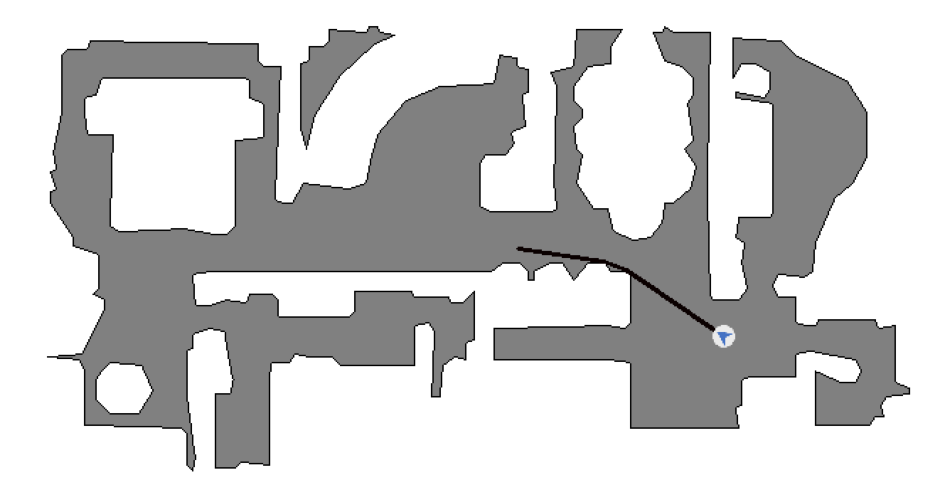

In [7]:
drawer = Draw()
path_0 = habitat_sim.ShortestPath()
path_0.requested_start = agent_state[0]
path_0.requested_end = aim_sound_point
sim.pathfinder.find_path(path_0)
pic = drawer.draw(sim,path_0.points)
drawer.display_map(pic)

begin


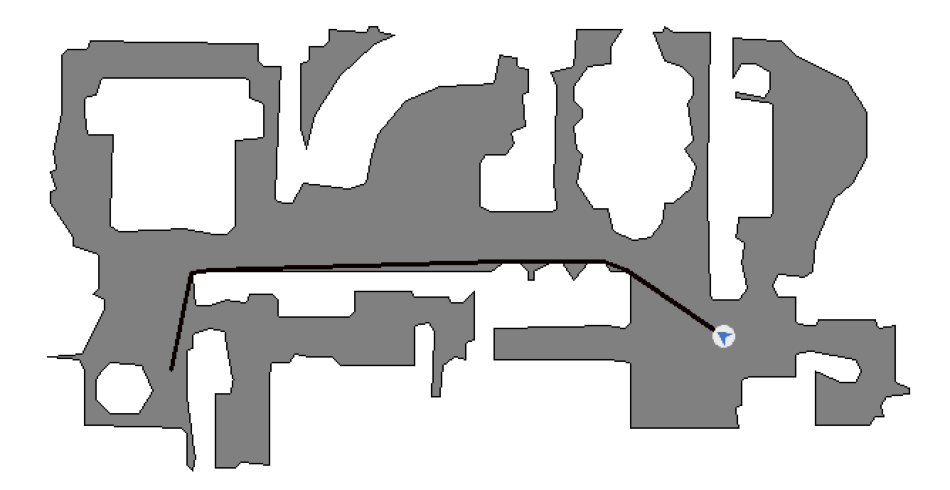

above is the target


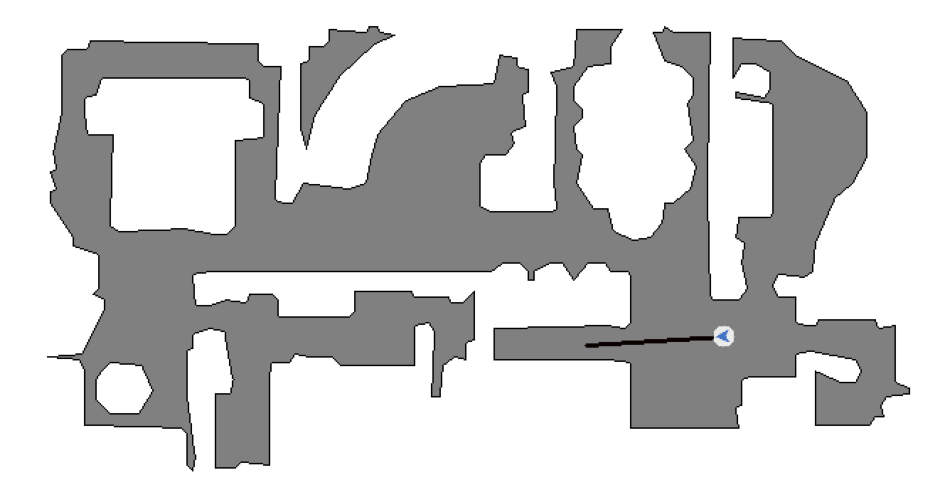

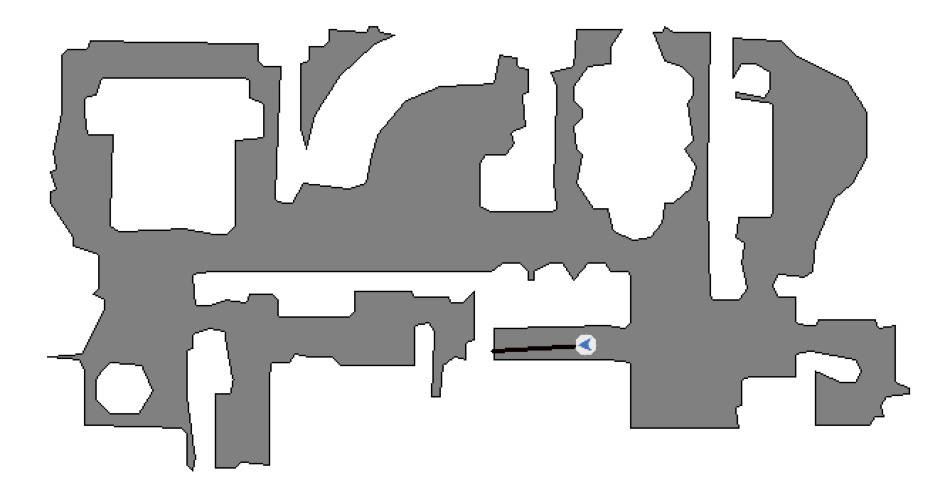

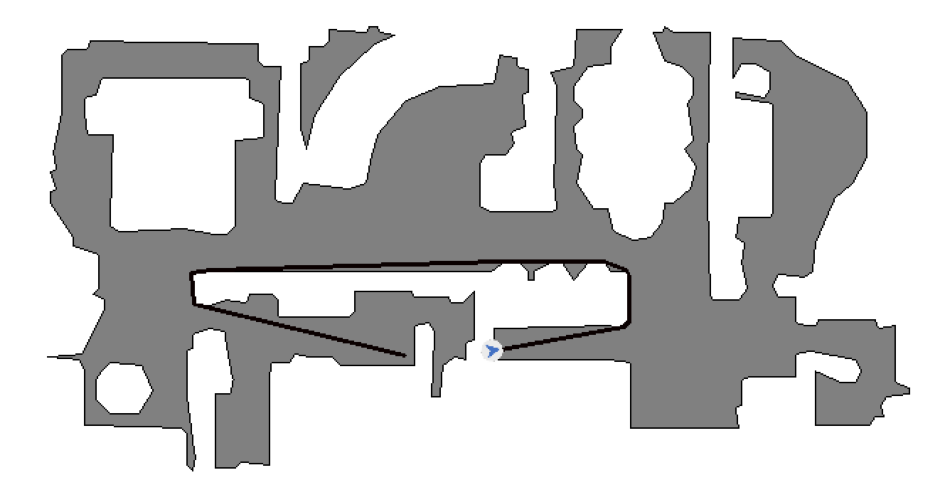

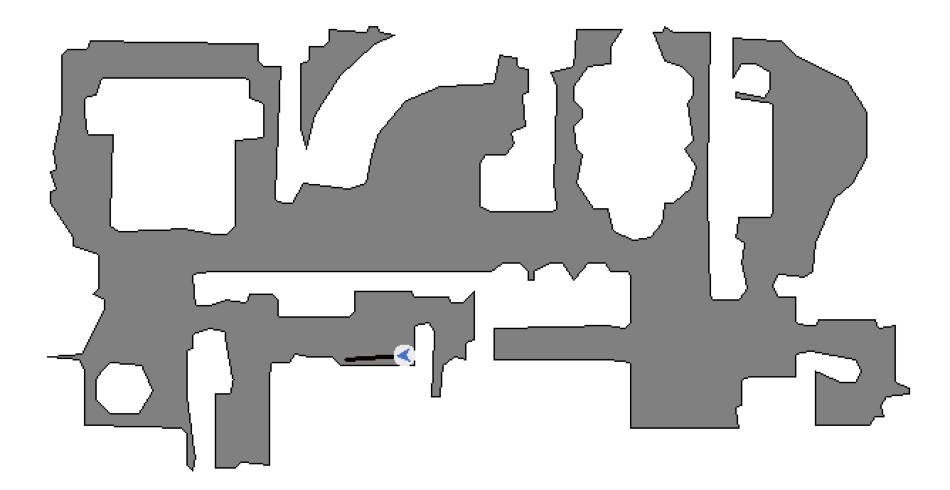

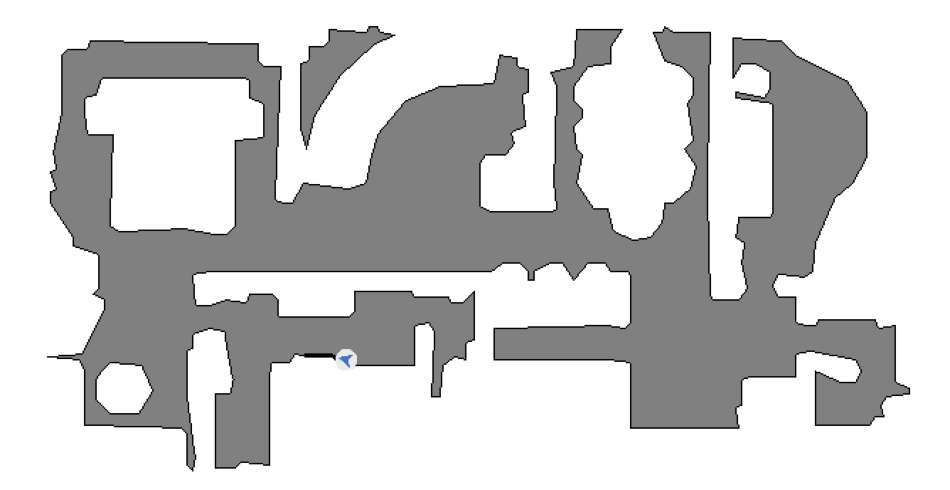

end!
begin


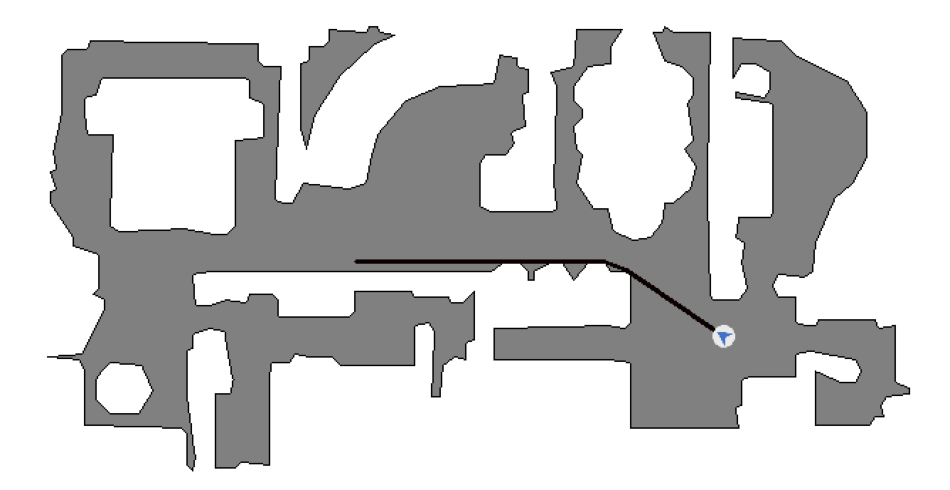

above is the target


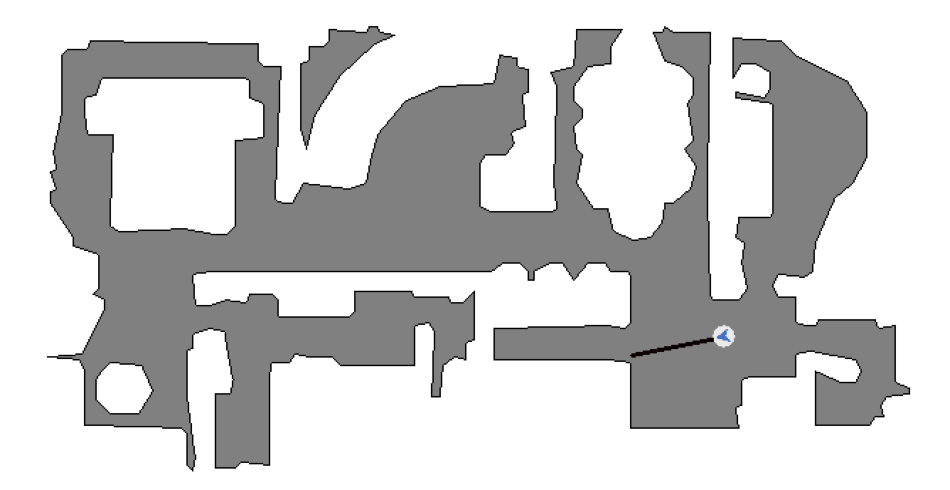

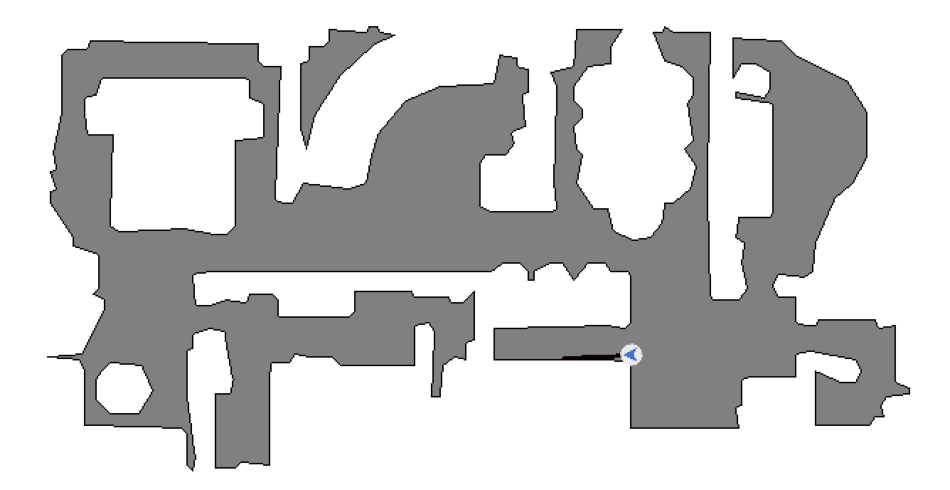

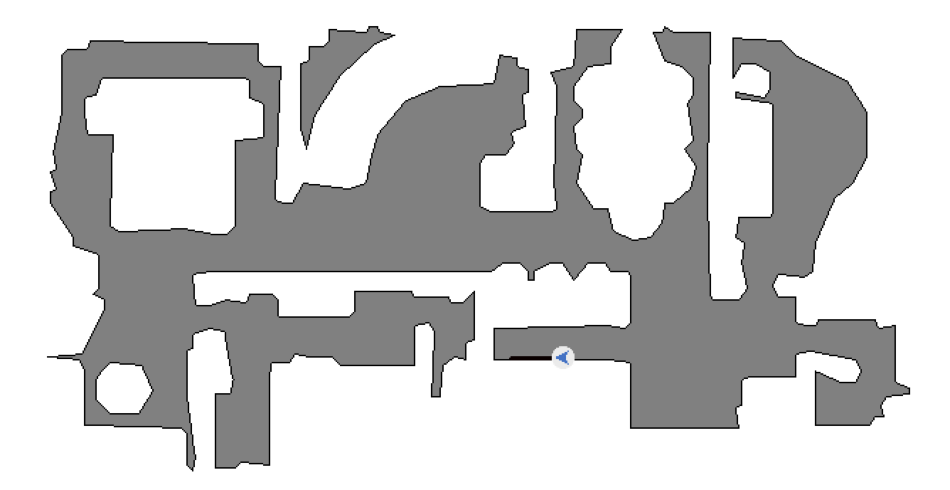

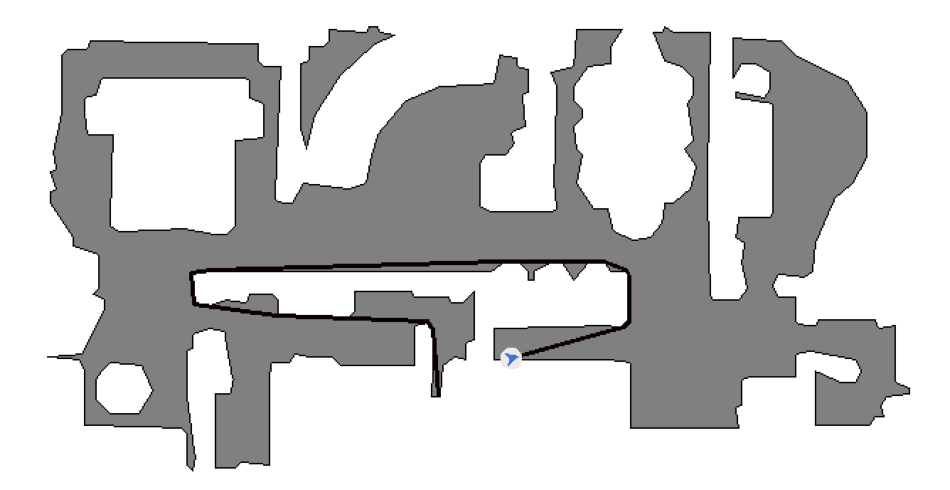

ValueError: negative dimensions are not allowed

In [8]:
for  i  in range(5):

    print("begin")
    end = sim.pathfinder.get_random_navigable_point()
    drawer = Draw()
    path_0 = habitat_sim.ShortestPath()
    path_0.requested_start = agent_state[0]
    path_0.requested_end = end
    sim.pathfinder.find_path(path_0)
    pic = drawer.draw(sim,path_0.points)
    drawer.display_map(pic)
    print("above is the target")

    next_position = NextPoint()
    # drawer = Draw()
    [x,z,y]= agent_state[0]
    path = list()
    path_ = habitat_sim.ShortestPath()
    for i in range(5):
        path_.requested_start = [x,z,y]
        x,y = next_position.get_next_position(path_.requested_start , end)
        path_.requested_end = [x,z,y]
        sim.pathfinder.find_path(path_)
        pic = drawer.draw(sim,path_.points)
        drawer.display_map(pic)
    print("end!")